In [1]:
# імпорт бібліотек
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### 1) Завантажити набiр даних "`Wine dataset"` через функцiю `load_wine()`,яка мiститься у модулi `sklearn.datasets.`

In [2]:
dataset = load_wine()


#### 2) Розбити датасет на навчальну та тестовi вибiрки, параметр `train_size(або test_size)` встановити самостiйно.

In [3]:
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=0.7, random_state=0)

#### 3) Провести навчання класифiкатора `DecisionTreeClassifier`, який мiститься у модулi `sklearn.tree`

>на навчальнiй вибiрцi змiнюючи його параметр `max_depth` в дiапазонi `[3, 10]` в циклi, що являє максимальну
глибину дерева, та трьох допустимих значень параметру `criterion`,
який задає критерiй розбиття. 

>В усiх експериментах параметр `random_state`
задавати одним й тим самим цiлим числом, для вiдтворення результату.

In [4]:
# максимальна глибина дерева
max_depth_values = range(3, 11)
# критерій оцінки дерева
criterion_values = ['gini', 'entropy', 'log_loss']
# записуємо точність для різних вибірок для оцінки функціоналу якості
train_scores = {criterion: [] for criterion in criterion_values}
test_scores = {criterion: [] for criterion in criterion_values}

>проведення навчання классифікатора

In [5]:
# Перебір різних критеріїв оцінки
for criterion in criterion_values:
    # Перебір різних значень глибини дерева
    for max_depth in max_depth_values:
        # Створення моделі дерева рішень з поточними значеннями критерію та глибини
        dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=0)
         # Навчання моделі на навчальній вибірці
        dtc.fit(X_train, y_train)
       
        train_accuracy = dtc.score(X_train, y_train)
        test_accuracy = dtc.score(X_test, y_test)
        train_scores[criterion].append(train_accuracy)
        test_scores[criterion].append(test_accuracy)
        # Вивід інформації про поточну комбінацію гіперпараметрів та точність моделі на навчальній та тестовій вибірках
        print(f'{criterion}|{max_depth}|{train_accuracy}|{test_accuracy}')
        
print(train_scores)
print(test_scores)

gini|3|0.9919354838709677|0.9444444444444444
gini|4|1.0|0.9444444444444444
gini|5|1.0|0.9444444444444444
gini|6|1.0|0.9444444444444444
gini|7|1.0|0.9444444444444444
gini|8|1.0|0.9444444444444444
gini|9|1.0|0.9444444444444444
gini|10|1.0|0.9444444444444444
entropy|3|0.9919354838709677|0.9629629629629629
entropy|4|1.0|0.9444444444444444
entropy|5|1.0|0.9444444444444444
entropy|6|1.0|0.9444444444444444
entropy|7|1.0|0.9444444444444444
entropy|8|1.0|0.9444444444444444
entropy|9|1.0|0.9444444444444444
entropy|10|1.0|0.9444444444444444
log_loss|3|0.9919354838709677|0.9629629629629629
log_loss|4|1.0|0.9444444444444444
log_loss|5|1.0|0.9444444444444444
log_loss|6|1.0|0.9444444444444444
log_loss|7|1.0|0.9444444444444444
log_loss|8|1.0|0.9444444444444444
log_loss|9|1.0|0.9444444444444444
log_loss|10|1.0|0.9444444444444444
{'gini': [0.9919354838709677, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'entropy': [0.9919354838709677, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'log_loss': [0.9919354838709677, 1.0, 1.0,

>будування графіків для кожного значення criterion

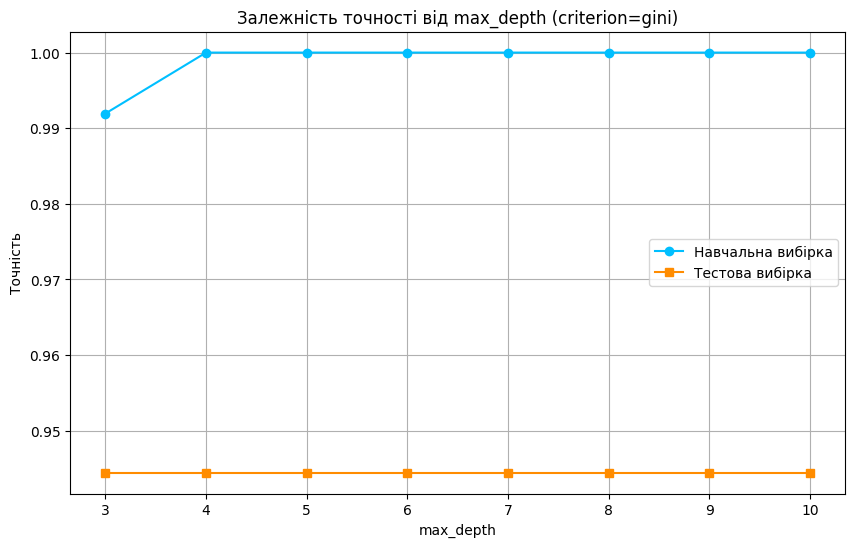

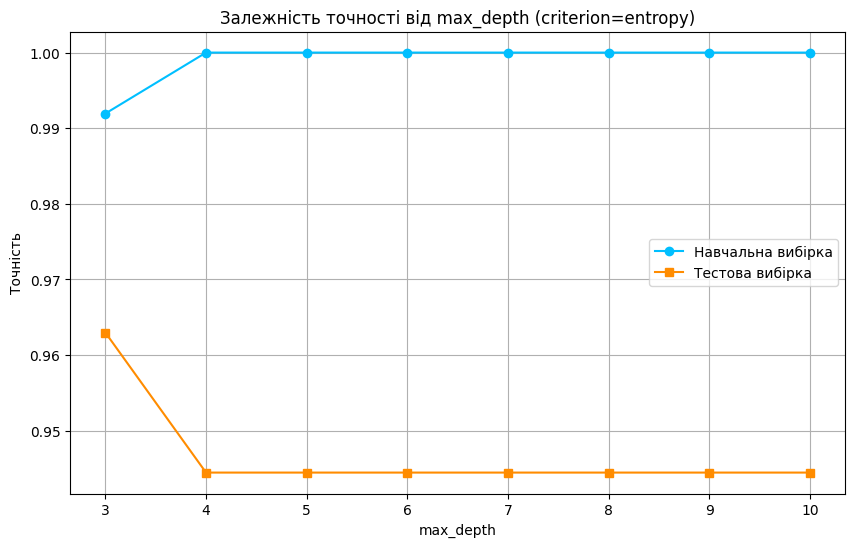

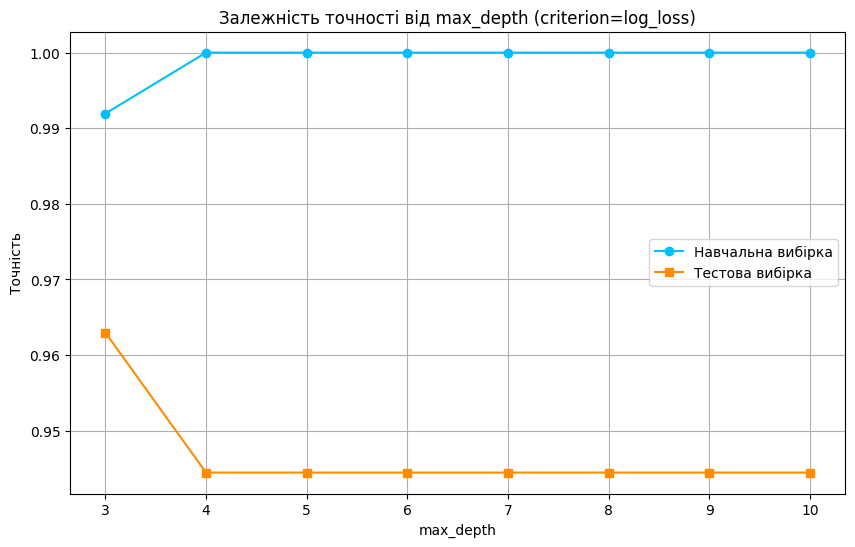

In [6]:
for criterion in criterion_values:
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_values, train_scores[criterion], marker='o', label='Навчальна вибірка', color='deepskyblue')
    plt.plot(max_depth_values, test_scores[criterion], marker='s', label='Тестова вибірка', color='darkorange')
    plt.xlabel('max_depth')
    plt.ylabel('Точність')
    plt.title(f'Залежність точності від max_depth (criterion={criterion})')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"./plots/lab2_decisiontree_{criterion}")
    plt.show()

#### 4) Провести навчання класифiкатора випадковим лiсом `RandomForestClassifier`, який мiститься у модулi `sklearn.tree` 

>на навчальнiй вибiрцi змiнюючи його параметр `n_estimators в дiапазонi [2, 20]` в циклi, що являє кiлькiсть дерев в лiсi, та трьох допустимих значень параметру `criterion`.

In [7]:
n_estimator_values = range(2, 21)
train_scores_rf = {criterion: [] for criterion in criterion_values}
test_scores_rf = {criterion: [] for criterion in criterion_values}

>проведення навчання классифікатора

In [8]:
for criterion in criterion_values:
    for n_estimator in n_estimator_values:
        rfc = RandomForestClassifier(n_estimators=n_estimator, criterion=criterion, random_state=0)
        rfc.fit(X_train, y_train)
        train_accuracy = rfc.score(X_train, y_train)
        test_accuracy = rfc.score(X_test, y_test)
        train_scores_rf[criterion].append(train_accuracy)
        test_scores_rf[criterion].append(test_accuracy)

        print(f'{criterion}|{n_estimator}|{train_accuracy}|{test_accuracy}')

print(train_scores_rf)
print(test_scores_rf)

gini|2|0.9354838709677419|0.8703703703703703
gini|3|0.9838709677419355|0.9259259259259259
gini|4|1.0|0.9629629629629629
gini|5|1.0|0.9814814814814815
gini|6|1.0|1.0
gini|7|1.0|1.0
gini|8|1.0|0.9814814814814815
gini|9|1.0|1.0
gini|10|1.0|1.0
gini|11|1.0|1.0
gini|12|1.0|1.0
gini|13|1.0|1.0
gini|14|1.0|1.0
gini|15|1.0|1.0
gini|16|1.0|1.0
gini|17|1.0|1.0
gini|18|1.0|1.0
gini|19|1.0|1.0
gini|20|1.0|1.0
entropy|2|0.9354838709677419|0.8888888888888888
entropy|3|1.0|0.9814814814814815
entropy|4|1.0|0.9629629629629629
entropy|5|1.0|1.0
entropy|6|1.0|0.9814814814814815
entropy|7|1.0|1.0
entropy|8|1.0|1.0
entropy|9|1.0|1.0
entropy|10|1.0|1.0
entropy|11|1.0|1.0
entropy|12|1.0|1.0
entropy|13|1.0|1.0
entropy|14|1.0|1.0
entropy|15|1.0|0.9814814814814815
entropy|16|1.0|1.0
entropy|17|1.0|1.0
entropy|18|1.0|1.0
entropy|19|1.0|1.0
entropy|20|1.0|1.0
log_loss|2|0.9354838709677419|0.8888888888888888
log_loss|3|1.0|0.9814814814814815
log_loss|4|1.0|0.9629629629629629
log_loss|5|1.0|1.0
log_loss|6|1.0|0.981

>будування графіків для кожного значення criterion

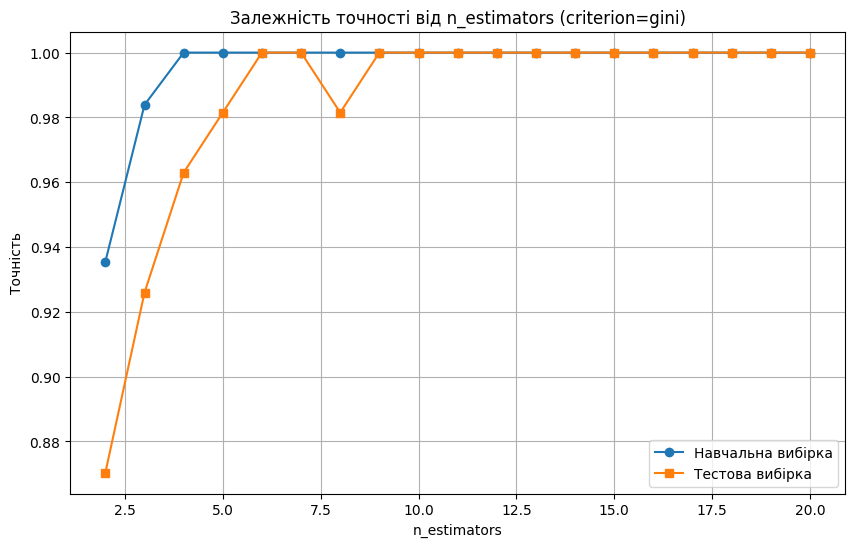

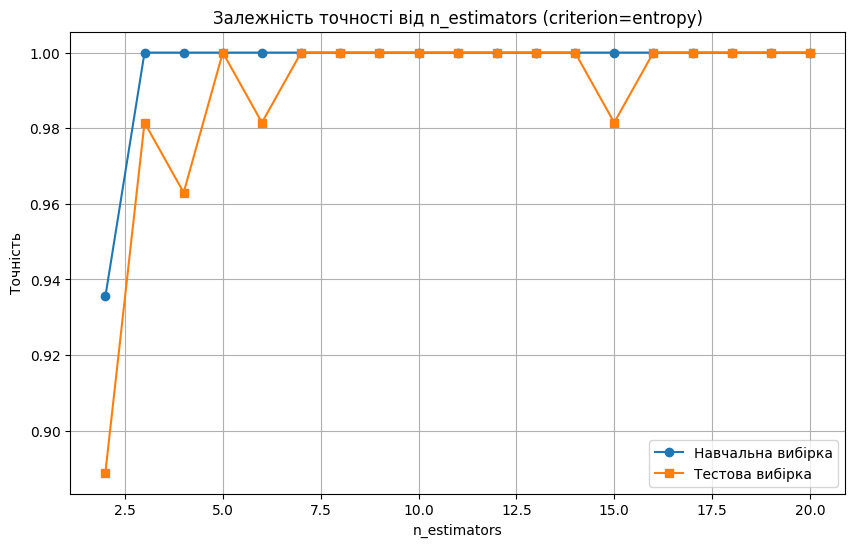

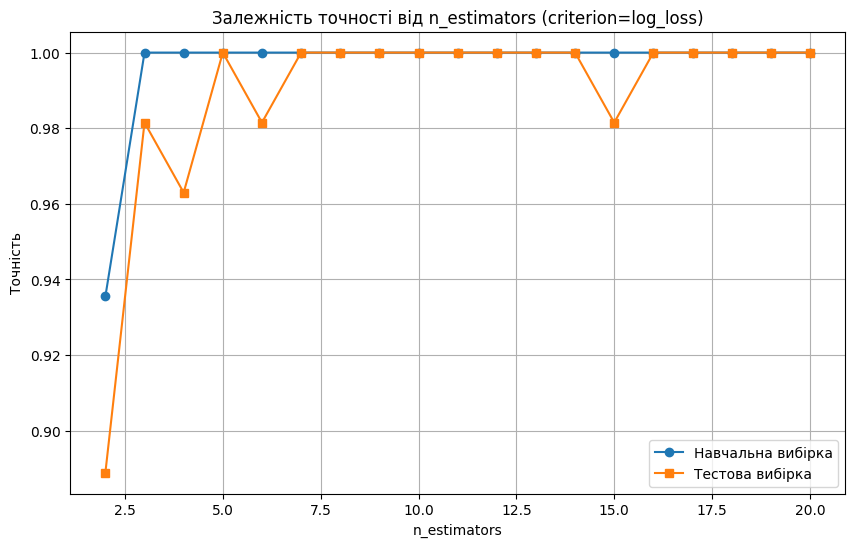

In [9]:
for criterion in criterion_values:
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimator_values, train_scores_rf[criterion], marker='o', label='Навчальна вибірка')
    plt.plot(n_estimator_values, test_scores_rf[criterion], marker='s', label='Тестова вибірка')
    plt.xlabel('n_estimators')
    plt.ylabel('Точність')
    plt.title(f'Залежність точності від n_estimators (criterion={criterion})')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"./plots/lab2_randomforest_{criterion}")
    plt.show()
